<a href="https://colab.research.google.com/github/SushanthOO7/CSE-475/blob/main/Lab4_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 475: Lab 4

In this lab, you will practice implementing decision trees and random forests.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button.

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, check the tools in Lab 1.

Acknowledgment: Much of the content in this notebook was adapted from Introduction to Data Mining, 2nd Edition by Tan, Steinbach, Karpatne, Kumar.

# **PUT YOUR GROUP INFO HERE**

| Group number | August Group XXX |            |
|--------------|------------------|------------|
| Member 1     | NAME             | ASURITE ID |
| Member 2     |                  |            |
| Member 3     |                  |            |
| Member 4     |                  |            |

Even if you want to work alone, please still sign up in a one-person group on canvas.


## Vertebrate Dataset

The vertebrate dataset we will use in this lab consists of samples containing information about vertebrates. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a  binary representation. To illustrate this, we will first load the data into a Pandas DataFrame object and display its content.

In [32]:
import pandas as pd

data = pd.read_csv('https://docs.google.com/uc?export=download&id=1DrqbYx-0E8qdHexxO7m9fo11444pz5v5', header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


Given the limited number of training examples (15), suppose we convert the problem into a binary classification task (mammals versus non-mammals). We can do so by replacing the class labels of the instances to *non-mammals* except for those that belong to the *mammals* class.

In [33]:
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','reptiles'], 'non-mammals')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


We can use the Pandas cross-tabulation function to examine the relationship between the Warm-blooded and Gives Birth attributes with respect to the class. This cross-tabulation gives the counts of mammals and non-mammals associated with each combination of Warm-blooded and Gives Birth values.

In [34]:
pd.crosstab([data['Warm-blooded'], data['Gives Birth']], data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

The results above show that it is possible to distinguish mammals from non-mammals using these two attributes alone since each combination of their attribute values would yield only instances that belong to the same class. For example, mammals can be identified as warm-blooded vertebrates that give birth to their young. Such a relationship can also be derived using a decision tree classifier, as shown by the example given in the next subsection.

## Decision Tree Classifier

In this section, we apply a decision tree classifier to the vertebrate dataset described in the previous subsection.

In [35]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'], axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

The preceding commands will extract the predictor (X) and target class (Y) attributes from the vertebrate dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'gini' as impurity measure. The classifier above is also constrained to generate trees with a maximum depth equals to 3. Next, the classifier is trained on the labeled data using the fit() function.

We can plot the resulting decision tree obtained after training the classifier.

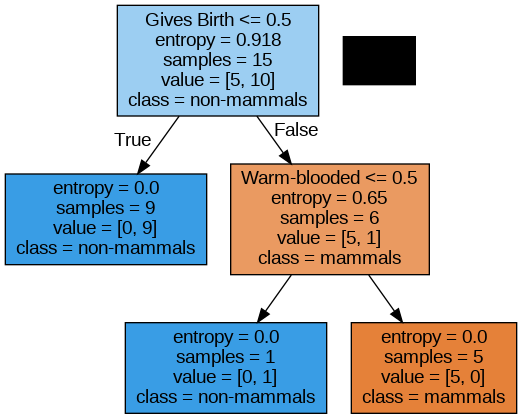

In [36]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Next, suppose we apply the decision tree to classify the following test examples.

In [37]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]

testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

In [38]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'], pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


Except for platypus, which is an egg-laying mammal, the classifier correctly predicts the class label of the test examples. We can calculate the accuracy of the classifier on the test data as shown by the example given below.

In [39]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


## Model Overfitting

To illustrate the problem of model overfitting, we consider a synthetic two-dimensional dataset containing 1500 labeled instances, each of which is assigned to one of two classes, 0 or 1. Instances from each class are generated as follows:
1. Instances from class 1 are generated from a mixture of 3 two-dimensional Gaussian distributions, centered at [6, 14], [10, 6], and [14, 14], respectively.
2. Instances from class 0 are generated from a uniform distribution in a two-dimensional square region, whose sides have a length equal to 20.

For simplicity, both classes have equal number of labeled instances. The code for generating and plotting the data is shown below. All instances from class 1 are shown in red while those from class 0 are shown in black.

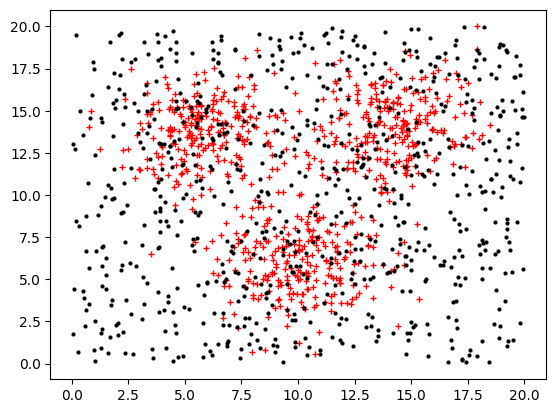

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
# Generate the dataset from class 1
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))

# Generate the dataset from class 0 and concatenate to the first dataset
X = np.concatenate((X, 20*np.random.rand(int(N/2), 2)))

# Assign the labels to classes 0 and 1
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In this example, we reserve 80% of the labeled data for training and the remaining 20% for testing. We then fit decision trees of different maximum depths (from 2 to 50) to the training set and plot their respective accuracies when applied to the training and test sets.

Text(0, 0.5, 'Accuracy')

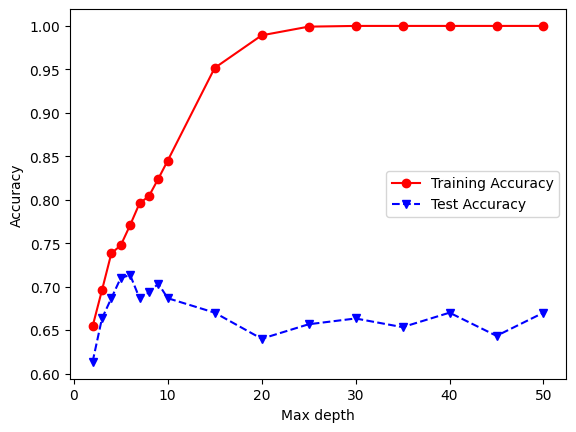

In [41]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

**Question 1: What happens to the training accuracy as the model becomes more complex (maximum depth of tree increases)? What happens to the test accuracy?**

**Answer:**

Training accuracy keeps increasing, while test accuracy first increases then decreases due to overfitting.

**Question 2: The model begins to overfit when the test accuracy starts to decrease while the training accuracy is still increasing. What is the approximate maximum depth at which the model starts to overfit?**

**Answer:**

Around depth 8

### Random Forest

A random forest is an ensemble of decision trees designed to improve generalization to unseen test data.

In the example below, we fit a random forest with varying numbers of decision trees to the 2-dimensional dataset using each ensemble method.

Text(0, 0.5, 'Accuracy')

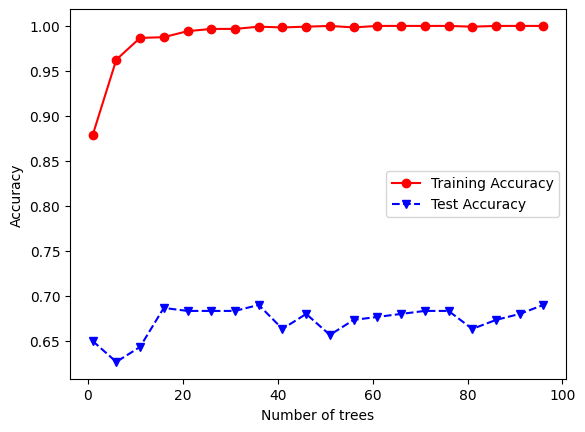

In [42]:
from sklearn import ensemble

maxdepth = 3
n_trees = range(1, 101, 5)

trainAcc = []
testAcc = []

for n in n_trees:
    clf = ensemble.RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(n_trees, trainAcc, 'ro-', n_trees, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')

## Iris dataset

Load the iris dataset used in Lab 2. Then perform the following steps:

1. Split the dataset into 80% train and 20% test (use random state = 50).
2. Train a decision tree with **max depth = 3 and using Gini index criterion** and print the resulting training and test accuracy.
3. Plot the resulting decision tree obtained after training the classifier using graphviz as in the vertebrate example.

In [43]:
# Load the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
# Split the dataset into 80% train and 20% test. Use a random state of 50 for reproducibility.
# YOUR CODE HERE

Y = data['class']
X = data.drop(['class'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)



In [45]:
# Train decision tree and print validation and test accuracy
# YOUR CODE HERE
np.random.seed(50)
c = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=50)
c = c.fit(X_train, Y_train)
Y_train_pred = c.predict(X_train)
Y_test_pred = c.predict(X_test)

train_ac = accuracy_score(Y_train, Y_train_pred)
test_ac = accuracy_score(Y_test, Y_test_pred)

print(f'Training Accuracy: {train_ac:.2f}')
print(f'Test Accuracy: {test_ac:.2f}')


Training Accuracy: 0.98
Test Accuracy: 0.97


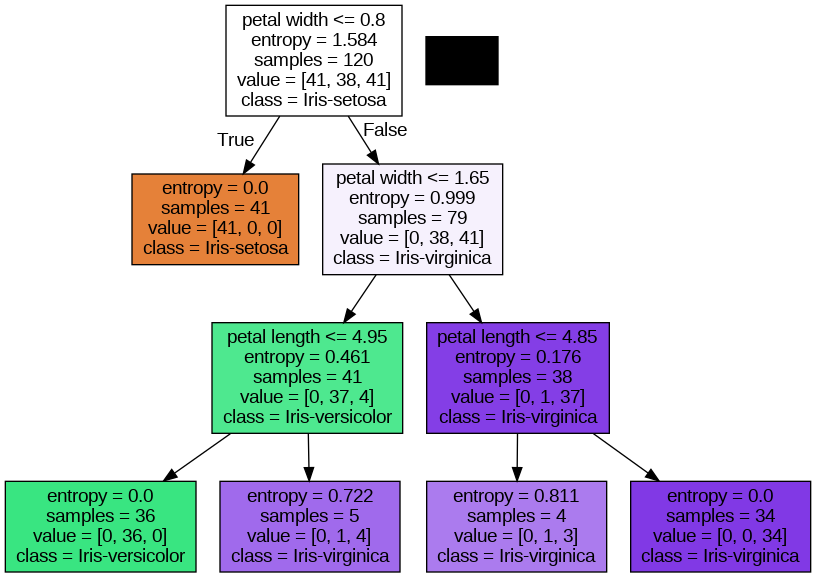

In [46]:
# Plot resulting decision tree
# YOUR CODE HERE

dot_data = tree.export_graphviz(c, feature_names=X.columns, class_names=c.classes_, filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Question 3: In Lab 2, we came up with rules that could be used to separate instances from the different iris classes, such as:**
- setosa if petal length < 2.5, virginica if petal length > 4.8, and versicolor otherwise
- setosa if petal width < 1, virginica if petal width > 1.4, and versicolor otherwise

**How do these rules compare to the splits learned by the decision tree?**

**Answer:**

The tree learns similar rules—mainly splits on petal length and petal width, matching the Lab 2 rules.